# EDA on TMDB Movie Dataset
Performing an Exploratory Data Analysis on TMDB movie dataset

## Import Libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading Data File
>The `tmdb-movies.csv` file contains information of about 10,000 movies collected from The Movie Database (TMDb), including user ratings and .revenue.

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


##  Exploring dataset

In [3]:
df.shape

(10866, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Dataset has a total of 10866 entries with 21 columns

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>We can notice a couple of **'0s'** in `budget` and `revenue` columns, which extended to `budget_adj` and `revenue_adj` respectively. It might be that the data collators are unable to get this figures when collating the data. This would affect our analysis on movie success so we might need to take care of this.

### Missing Values

In [7]:
null_vals = df.isnull().sum()
null_vals.where(null_vals > 0).dropna()

imdb_id                   10.0
cast                      76.0
homepage                7930.0
director                  44.0
tagline                 2824.0
keywords                1493.0
overview                   4.0
genres                    23.0
production_companies    1030.0
dtype: float64

## Cleaning
>I will be performing an EDA on both **movie profit** and **movie votes** in which case I will have 2 datasets. 
>I am using 2 datasets because I noticed a couple of `0s` in the revenue and budget columns, if not removed, they will affect my analysis.

### Drop rows with missing `cast`, `director`, `genres` and `production_companies`

In [8]:
df = df.dropna(subset=['cast', 'director', 'genres', 'production_companies'])
df.shape

(9773, 21)

### Obtain movies with financial data
>Extracting movies with actual `budget` and `revenue`

In [9]:
df = df.query('budget > 100 and revenue > 100').copy()
df.shape

(3777, 21)

### Add `profit_adj` base on `revenue_adj - budget_adj`

In [10]:
df['profit_adj'] = df['revenue_adj'] - df['budget_adj']
df.shape

(3777, 22)

### Fixing `release_date`

In [11]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.release_date.dtype

dtype('<M8[ns]')

### Handling duplicates

In [12]:
n_duplicate_rows = df.duplicated().sum() 
n_duplicate_movie_titles = df.shape[0] - df.original_title.nunique()

n_duplicate_rows, n_duplicate_movie_titles

(1, 44)

>There is a row that is a complete duplicate of another and there are about 261 movies with titles that are duplicates of another movie.

In [13]:
duplicate_title = df.original_title.value_counts()
duplicate_title[duplicate_title > 1]

King Kong                       2
Arthur                          2
RoboCop                         2
Unknown                         2
Halloween II                    2
Legend                          2
Teenage Mutant Ninja Turtles    2
Conan the Barbarian             2
Shaft                           2
Halloween                       2
Neighbors                       2
Psycho                          2
The Great Gatsby                2
Hercules                        2
Casino Royale                   2
The Karate Kid                  2
Robin Hood                      2
A Nightmare on Elm Street       2
Clash of the Titans             2
TEKKEN                          2
Point Break                     2
Fantastic Four                  2
Beowulf                         2
The Avengers                    2
The Thing                       2
Doctor Dolittle                 2
Friday the 13th                 2
Straw Dogs                      2
Fair Game                       2
The Three Musk

In [14]:
df.query('original_title == "King Kong"')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
6215,254,tt0360717,1.508329,207000000,550000000,King Kong,Naomi Watts|Jack Black|Adrien Brody|Thomas Kre...,NaN,Peter Jackson,The eighth wonder of the world.,...,187,Adventure|Drama|Action,WingNut Films|Universal Pictures|Big Primate P...,2005-12-14,1289,6.4,2005,2.311286e+08,6.141098e+08,3.829812e+08
10178,10730,tt0074751,0.886830,24000000,52614445,King Kong,Jeff Bridges|Jessica Lange|Charles Grodin|John...,NaN,John Guillermin,The most exciting original motion picture even...,...,134,Action|Adventure|Drama|Horror|Science Fiction,Paramount Pictures,1976-09-08,70,5.9,1976,9.196075e+07,2.016027e+08,1.096419e+08


>A little more eploring shows different production of the same movie

In [15]:
df[['original_title', 'release_year']][df[['original_title', 'release_year']].duplicated()]

,original_title,release_year
2090,TEKKEN,2010


In [16]:
df.query('original_title == "TEKKEN"')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,30000000.0,967000.0,-29033000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,30000000.0,967000.0,-29033000.0


>So "TEKKEN" Seems to be the duplicate row...

In [17]:
df.drop_duplicates(inplace=True)
df[['original_title', 'release_year']][df[['original_title', 'release_year']].duplicated()]

,original_title,release_year


### Expanding columns
Would use the function below to expand above columns when trying to analyse them. 

In [18]:
# Function that splits columns with combined string rows
def split_column(dframe, column, sep):
    new_df = pd.DataFrame(columns=dframe.columns) # Create empty DataFrame
    new_df = new_df.astype(dframe.dtypes) # Making sure new_df is of same type as the dataframe passed in
    nrows = dframe.shape[0] # number of rows in dataframe
    for i in range(nrows):
        row = dframe.iloc[i]
        if row.isnull()[column]: # Check for 'nan' values
            new_df = new_df.append(row, ignore_index=True) # If nan, just append original column
        else:
            items = row[column].split(sep)
            for item in items:
                row_copy = row.copy()
                row_copy[column] = item
                new_df = new_df.append(row_copy, ignore_index=True)
                
    return new_df

## EDA

In [19]:
# Defining standard colors for plot
std_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

### Top 20 highest voted movies

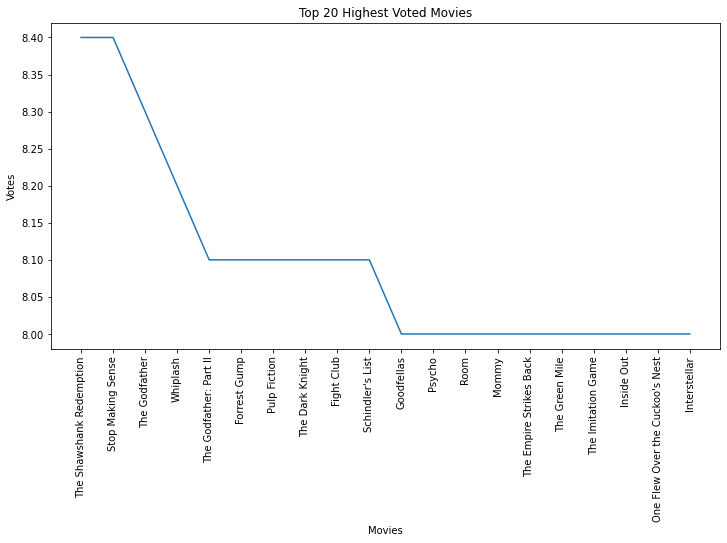

In [20]:
top_20_highest_rated = df.sort_values('vote_average', ascending=False).head(20)
plt.figure(figsize=(12, 6))
plt.plot(top_20_highest_rated.original_title, top_20_highest_rated.vote_average)
plt.title('Top 20 Highest Voted Movies')
plt.xticks(rotation=90)
plt.xlabel('Movies')
plt.ylabel('Votes');

### Directors analysis

In [21]:
# Create a copy of the dataset for directors analysis. I am doing this so I don't over explode the dataset when analyzing 
# cast, genres and production companies
df_directors = df.copy()

In [22]:
# Checking to see scenerios of multiple directors for one movie
dir_subset = df_directors[df_directors['director'].str.contains('\|')].copy() # Used "\|" because "|" is used as "logical or" in regex
dir_subset.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09,9.961120e+08
11,76757,tt1617661,6.189369,176000003,183987723,Jupiter Ascending,Mila Kunis|Channing Tatum|Sean Bean|Eddie Redm...,http://www.jupiterascending.com,Lana Wachowski|Lilly Wachowski,Expand your universe.,...,124,Science Fiction|Fantasy|Action|Adventure,Village Roadshow Pictures|Dune Entertainment|A...,2015-02-04,1937,5.2,2015,1.619199e+08,1.692686e+08,7.348699e+06


In [23]:
# Spliting directors
dir_split = split_column(dir_subset, 'director', '|')

In [24]:
# Drop rows with concatenated directors and append rows with 

# Droping
df_directors.drop(dir_subset.index, inplace=True)

# Appending
df_directors = df_directors.append(dir_split, ignore_index=True)

df_directors.shape

(4080, 22)

#### Top 20 directors based on vote

In [34]:
top_20_dir

director
Damien Chazelle       8.200000
Xavier Dolan          8.000000
Lenny Abrahamson      8.000000
Tony Kaye             8.000000
Morten Tyldum         8.000000
Josh Boone            7.800000
Richard Marquand      7.800000
Lucy Walker           7.800000
Ashutosh Gowariker    7.800000
Jaco Van Dormael      7.800000
Rajkumar Hirani       7.800000
Giuseppe Tornatore    7.700000
Ari Folman            7.700000
Robert Mulligan       7.700000
Ronald Neame          7.700000
Irwin Allen           7.700000
Christopher Nolan     7.637500
Pete Docter           7.633333
Dan Gilroy            7.600000
Alex Garland          7.600000
Name: vote_average, dtype: float64

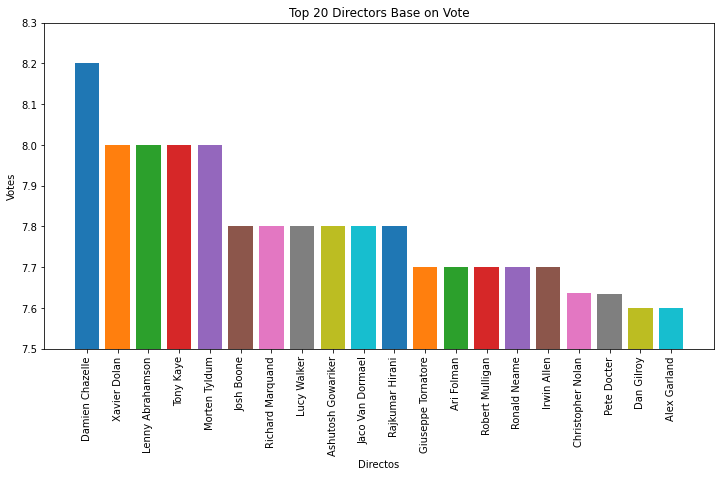

In [33]:
top_20_dir = df_directors.groupby('director').vote_average.mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 6))
plt.bar(top_20_dir.index, top_20_dir, color=std_colors)
plt.title('Top 20 Directors Base on Vote')
plt.xticks(rotation=90)
plt.xlabel('Directos')
plt.ylim([7.5, 8.3])
plt.ylabel('Votes');

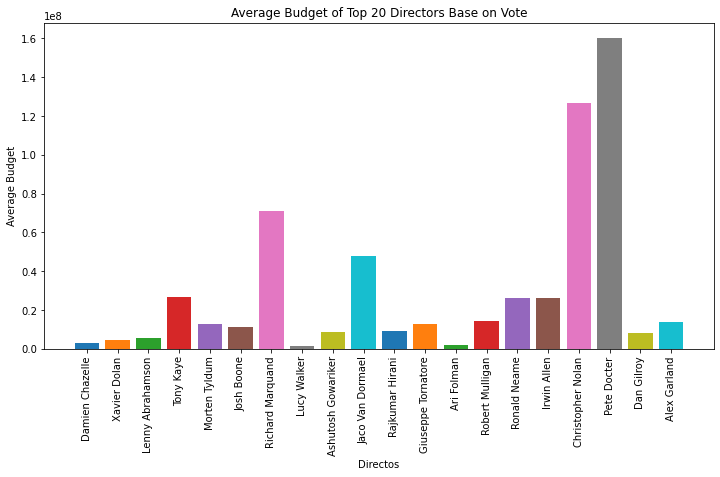

In [27]:
top_20_dir_budget = df_directors.groupby('director').budget_adj.mean()[top_20_dir.index]
plt.figure(figsize=(12, 6))
plt.bar(top_20_dir_budget.index, top_20_dir_budget, color=std_colors)
plt.title('Average Budget of Top 20 Directors Base on Vote')
plt.xticks(rotation=90)
plt.xlabel('Directos')
plt.ylabel('Average Budget');

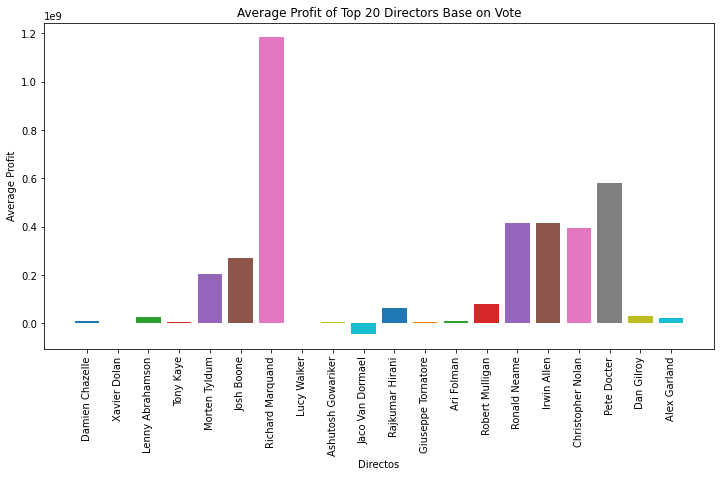

In [39]:
top_20_dir_profit = df_directors.groupby('director').profit_adj.mean()[top_20_dir.index]
plt.figure(figsize=(12, 6))
plt.bar(top_20_dir_profit.index, top_20_dir_profit, color=std_colors)
plt.title('Average Profit of Top 20 Directors Base on Vote')
plt.xticks(rotation=90)
plt.xlabel('Directos')
plt.ylabel('Average Profit');

#### Directors of Top 10 highest voted movies

In [295]:
top_directors = df_directors.query('id in @top_10_highest_rated.id').director
top_directors

171          Damien Chazelle
633            David Fincher
849        Christopher Nolan
1295       Quentin Tarantino
1296          Frank Darabont
1297         Robert Zemeckis
2336    Francis Ford Coppola
2560          Jonathan Demme
3238    Francis Ford Coppola
3363        Steven Spielberg
Name: director, dtype: object

In [298]:
# List of movies of top directors
top_directors_movies = df_directors.query('director in @top_directors')
top_directors_movies.shape

(97, 21)

#### Ploting `average`, `min` and `max` vote received top directors movies

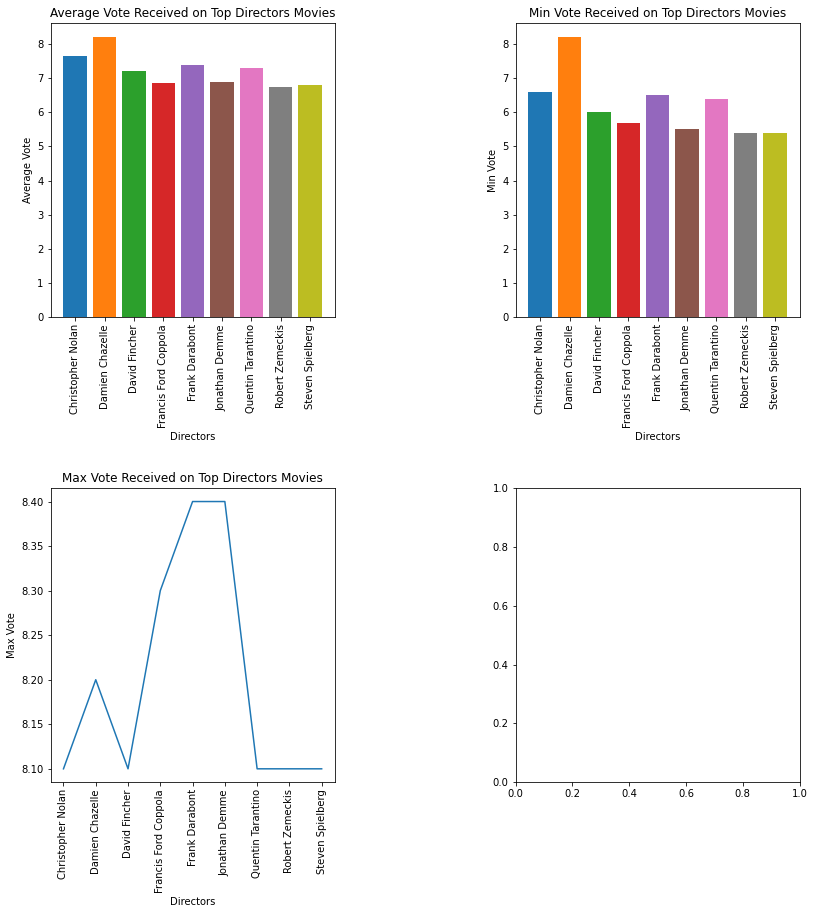

In [344]:
# Create subplot for the 3 plots
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

fig.tight_layout(pad=15.0)

# Average vote received on top directors movies
avg_vote_per_dir = top_directors_movies.groupby('director').mean().vote_average
axs[0, 0].bar(avg_vote_per_dir.index, avg_vote_per_dir, color=colors)
axs[0, 0].set_title('Average Vote Received on Top Directors Movies')
axs[0, 0].set(xlabel='Directors', ylabel='Average Vote')
axs[0, 0].tick_params(axis='x', rotation=90)

# Min vote received on top directors movies
min_vote_per_dir = top_directors_movies.groupby('director').vote_average.min()
axs[0, 1].bar(min_vote_per_dir.index, min_vote_per_dir, color=colors)
axs[0, 1].set_title('Min Vote Received on Top Directors Movies')
axs[0, 1].set(xlabel='Directors', ylabel='Min Vote')
axs[0, 1].tick_params(axis='x', rotation=90)

# Max vote received on top directors movies
max_vote_per_dir = top_directors_movies.groupby('director').vote_average.max()
axs[1, 0].plot(max_vote_per_dir.index, max_vote_per_dir)
axs[1, 0].set_title('Max Vote Received on Top Directors Movies')
axs[1, 0].set(xlabel='Directors', ylabel='Max Vote')
axs[1, 0].tick_params(axis='x', rotation=90);